<a href="https://colab.research.google.com/github/Babu6030/Airbnb-Booking-Analysis-2019/blob/main/Babu_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Information**
 The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
 Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Data Description**:

Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

# **Step 1: Importing Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set(font_scale=1)

In [ ]:
#import dataset from drive
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone EDA Project/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [ ]:
#head of dataset
df.head(4)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1


In [ ]:
##Tail of dataset
df.tail(4)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#Statistical Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Step 2: Preprocessing Data**

In [ ]:
#Checking for Duplication of Data
df.duplicated().sum()

0

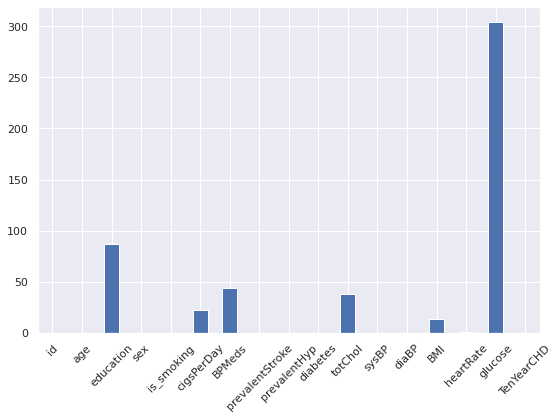

In [ ]:
#Checking for null values present in Data
df.isnull().sum().plot(figsize=(9,6),kind='bar')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#replace columns with Most Frequent Values and drop the lesser na values
for x in ['BPMeds', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']:
  df[x].fillna(df[x].mode()[0],inplace=True)

df.dropna(inplace=True)

In [ ]:
#Recheck for null values
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#Finding Unique Values
categorical_values = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

id : [   0    1    2 ... 3387 3388 3389]
age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 48 37 52 57 68 67 65 33 66 69 70 32]
education : [2. 4. 1. 3.]
sex : ['F' 'M']
is_smoking : ['YES' 'NO']
cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25. 43.  5.  7. 50. 19. 18.
  1. 45.  2.  6. 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
BPMeds : [0. 1.]
prevalentStroke : [0 1]
prevalentHyp : [0 1]
diabetes : [0 1]
totChol : [221. 212. 250. 233. 241. 272. 238. 295. 220. 326. 240. 210. 213. 227.
 188. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252. 198.
 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346. 202.
 340. 334. 351. 235. 243. 196. 275. 186. 190. 234. 264. 156. 260. 225.
 183. 246. 268. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165. 302.
 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200. 244.
 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194. 271.
 313. 305. 285. 169. 224. 201. 185.

In [ ]:
# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['is_smoking'] = le.fit_transform(df['is_smoking'])

# Step 3: Exploratory Data Analysis



# *Univariate Analysis*

In [ ]:
#Dropping unnecessary columns
df=df.drop(['id'] ,axis=1)

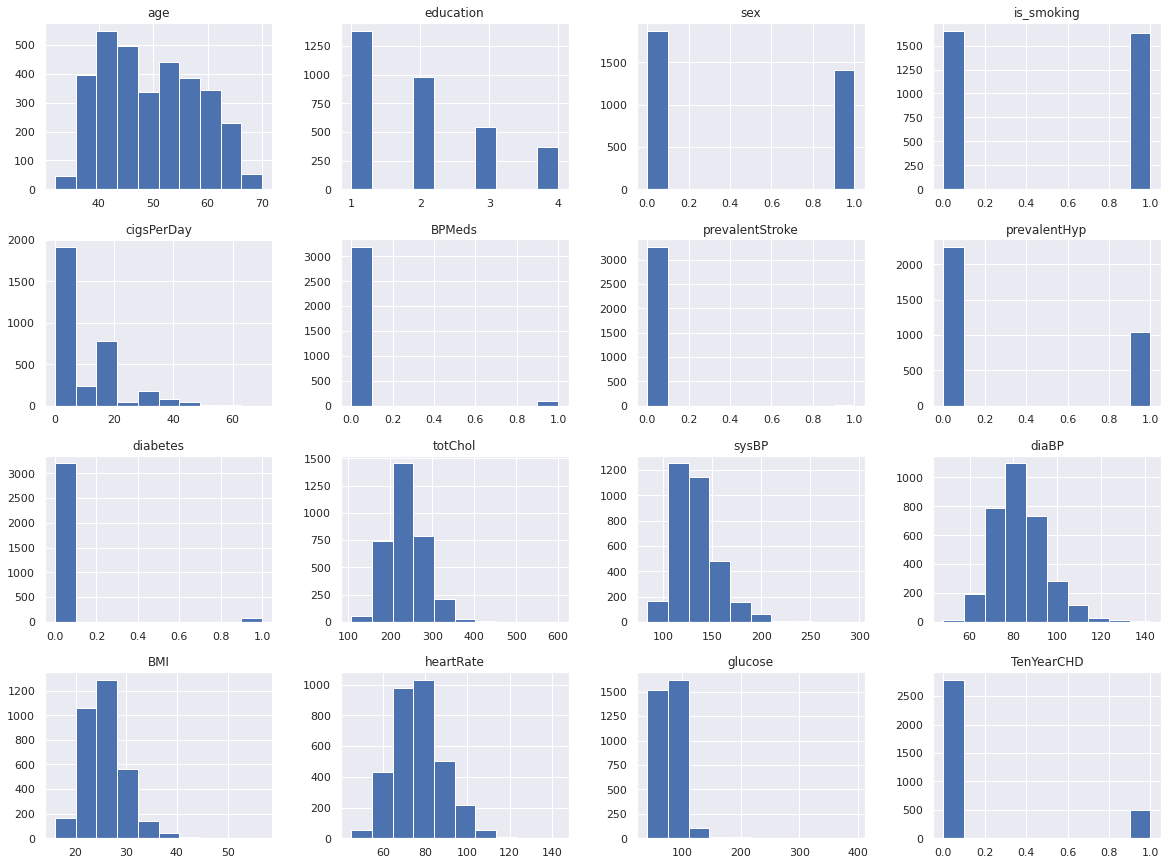

In [ ]:
#Histrogram to check Variations in Data
df.hist(figsize=(20,15))
plt.show()

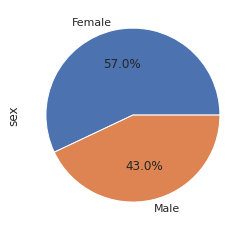

In [ ]:
#sns.factorplot('sex',data=df,kind='count',xticklabel=['F','M'])
hg=df['sex'].value_counts()
hg.plot(kind='pie',labels=["Female","Male"],autopct='%0.1f%%')
plt.show()

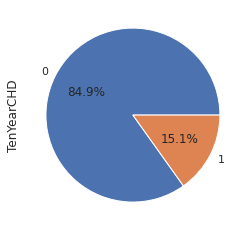

In [ ]:
#Target Distribution
df['TenYearCHD'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

There is imbalance data we will use SMOTE method to resample

Bi-Variate Analysis

# *Plots are Compared with the Target Value*

In [ ]:
# Function to get plots 
def plot(x):
  x,y=x,'TenYearCHD'
  plt.figure(figsize=(21,7))
  sns.countplot(x=x,hue=y,data=df)
  plt.title(x+' vs {}'.format(y),fontsize=20)
  plt.xlabel(x,fontsize=10)
  plt.ylabel(y,fontsize=10)
  plt.show()

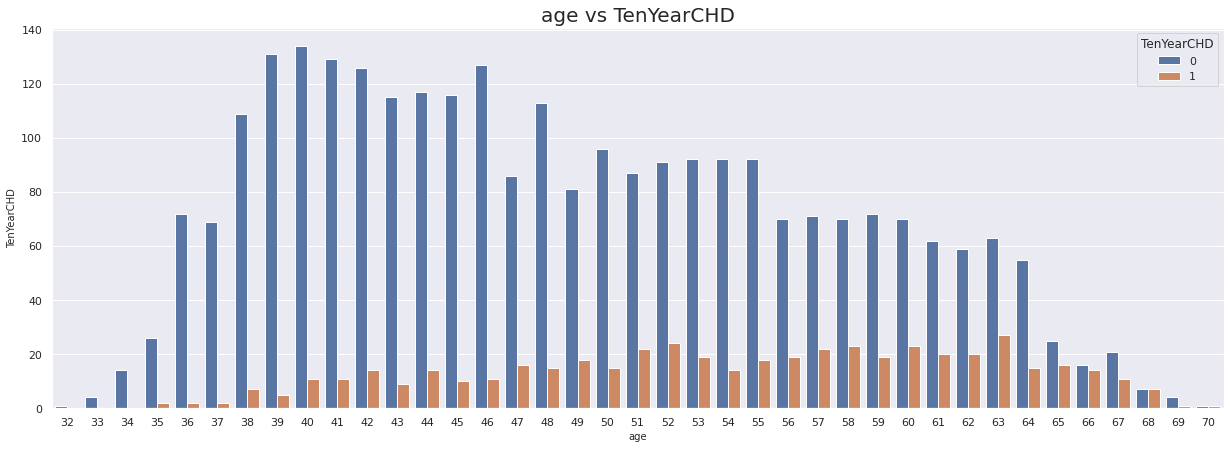

In [ ]:
plot('age')

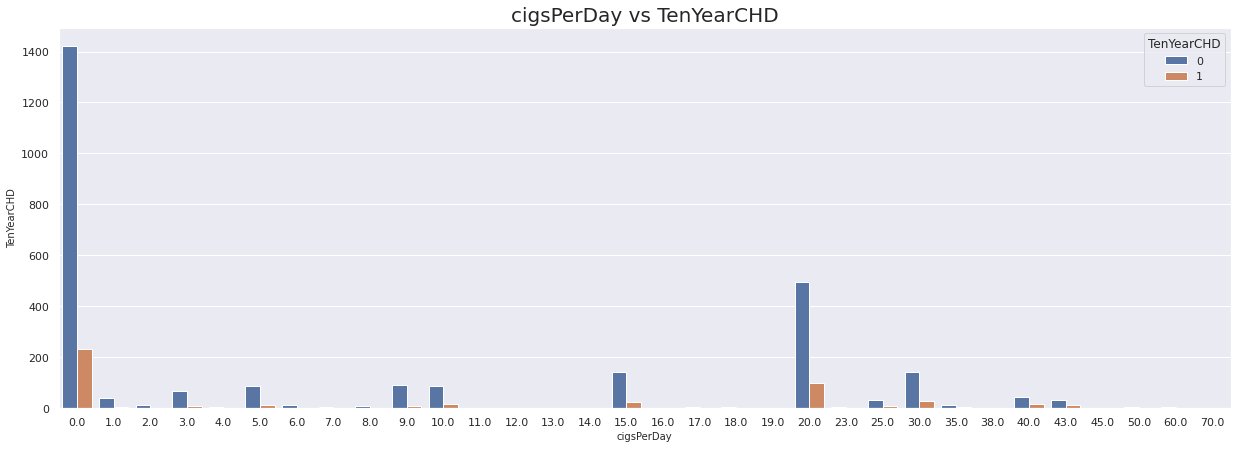

In [ ]:
plot('cigsPerDay')

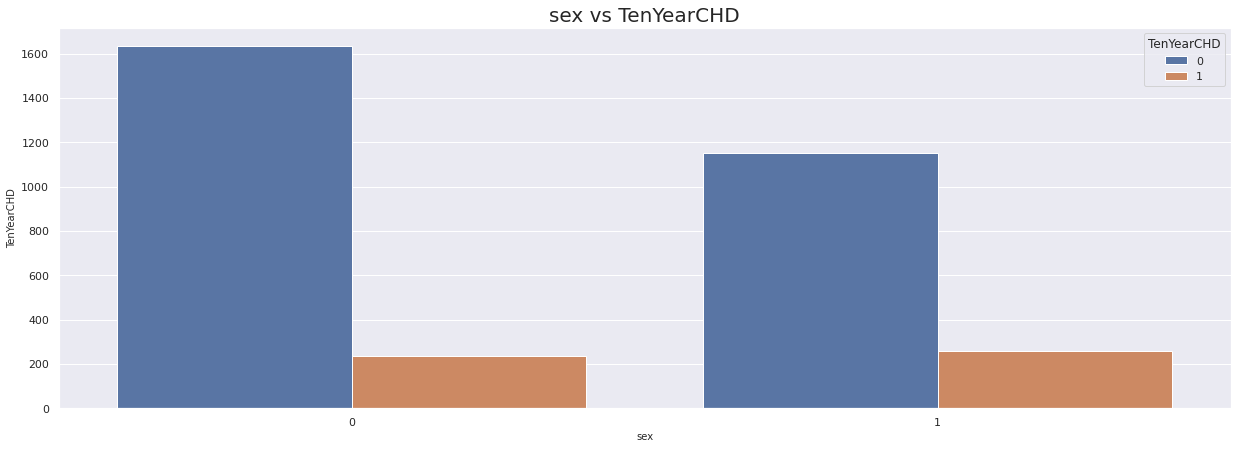

In [ ]:
plot('sex')

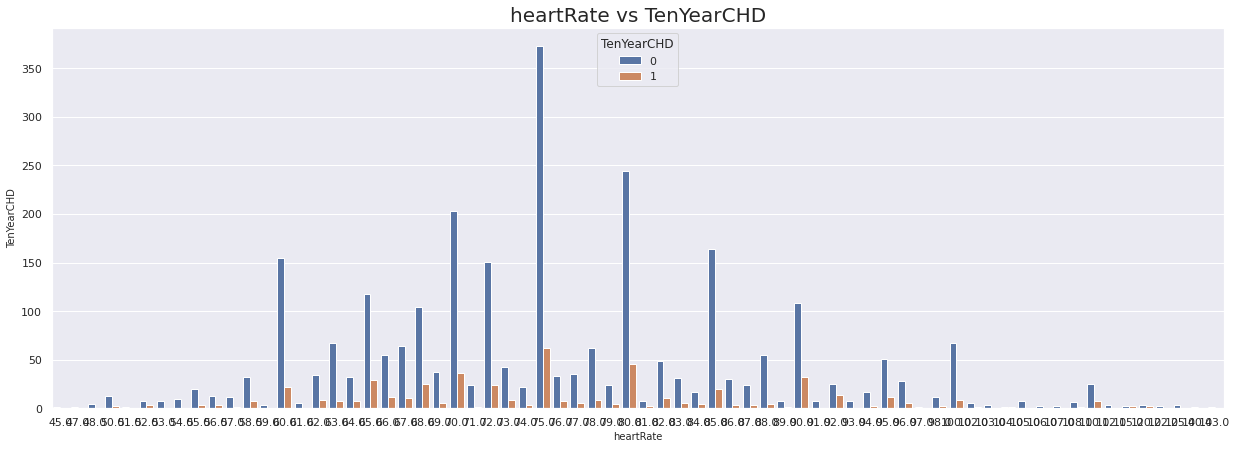

In [ ]:
plot('heartRate')

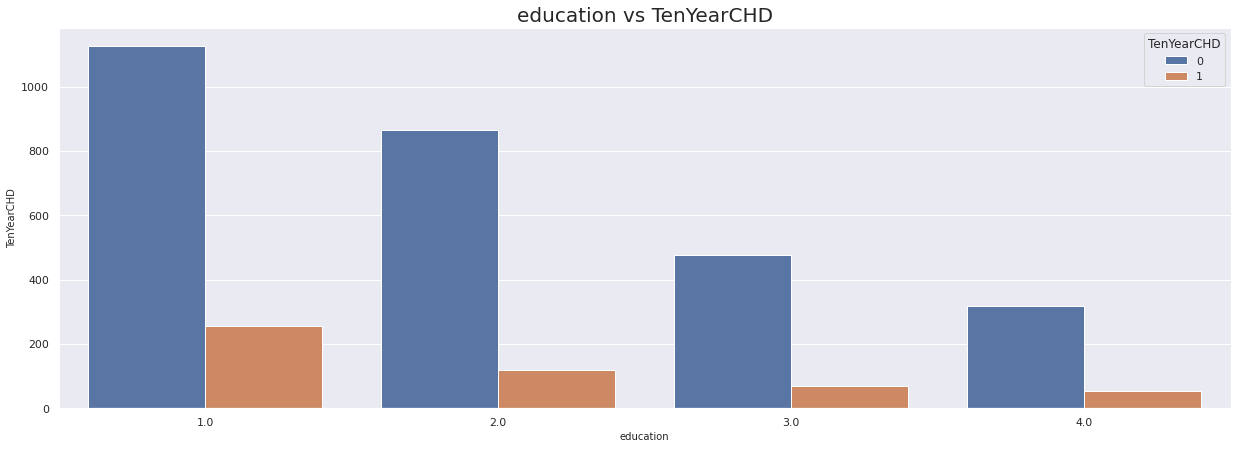

In [ ]:
plot('education')

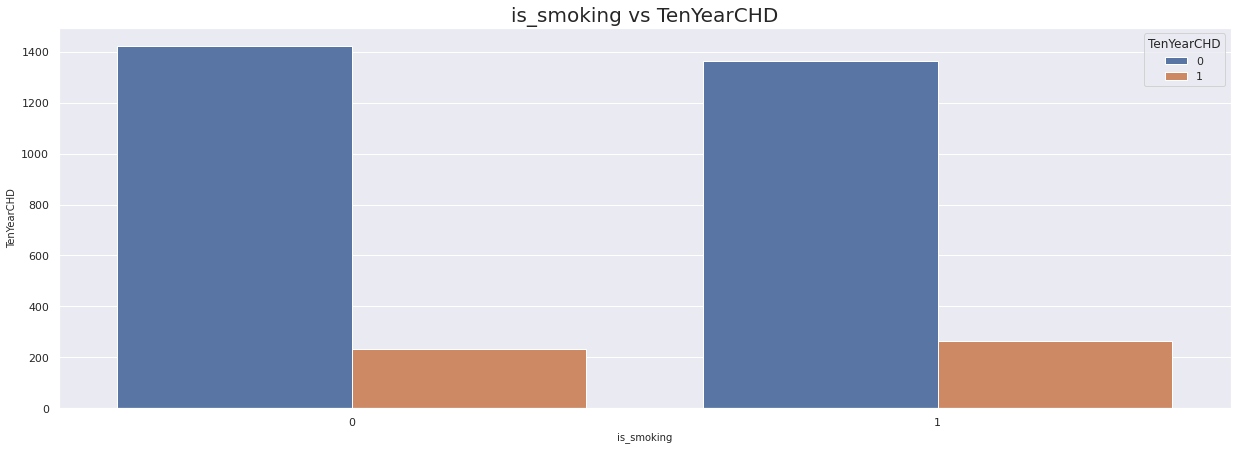

In [ ]:
plot('is_smoking')

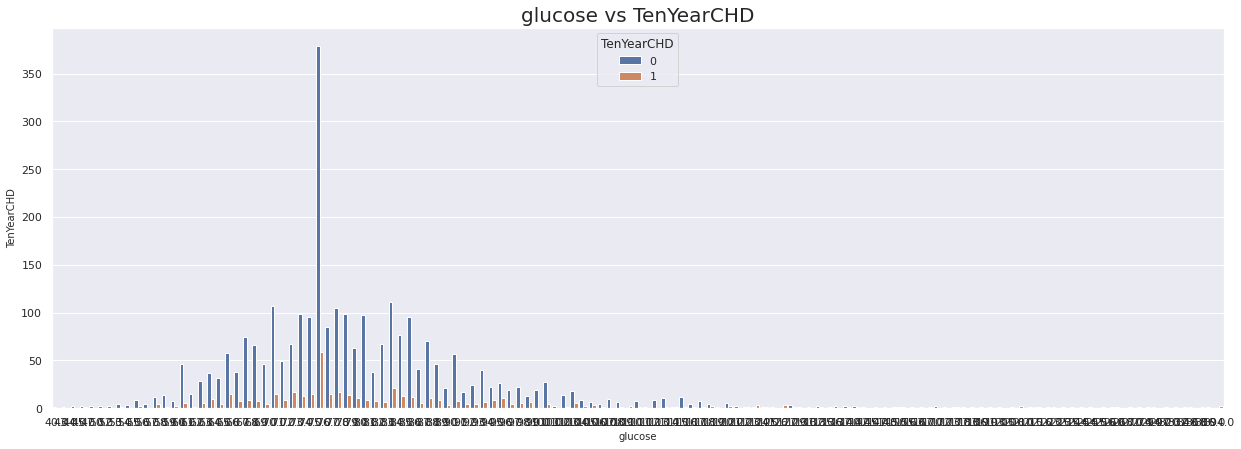

In [ ]:
plot('glucose')

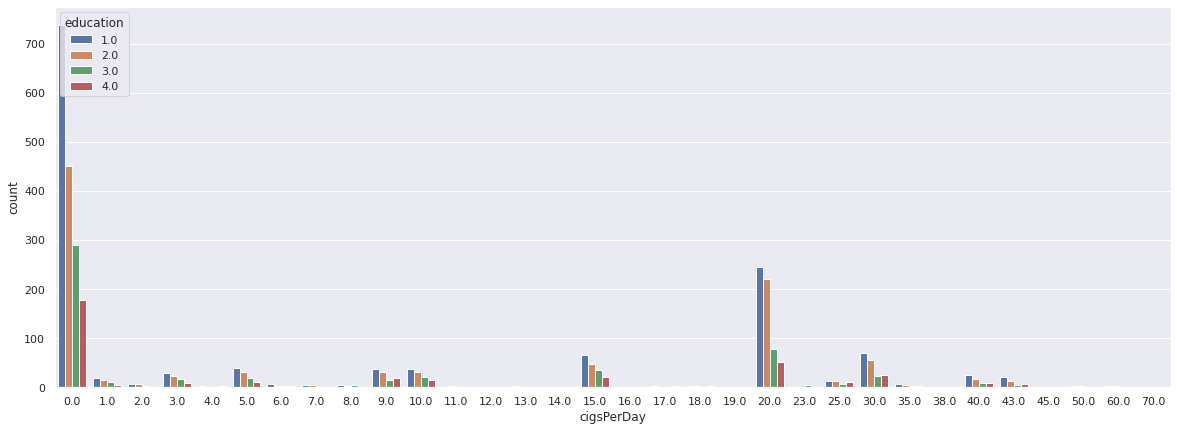

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='cigsPerDay',hue='education',data=df)
plt.show()

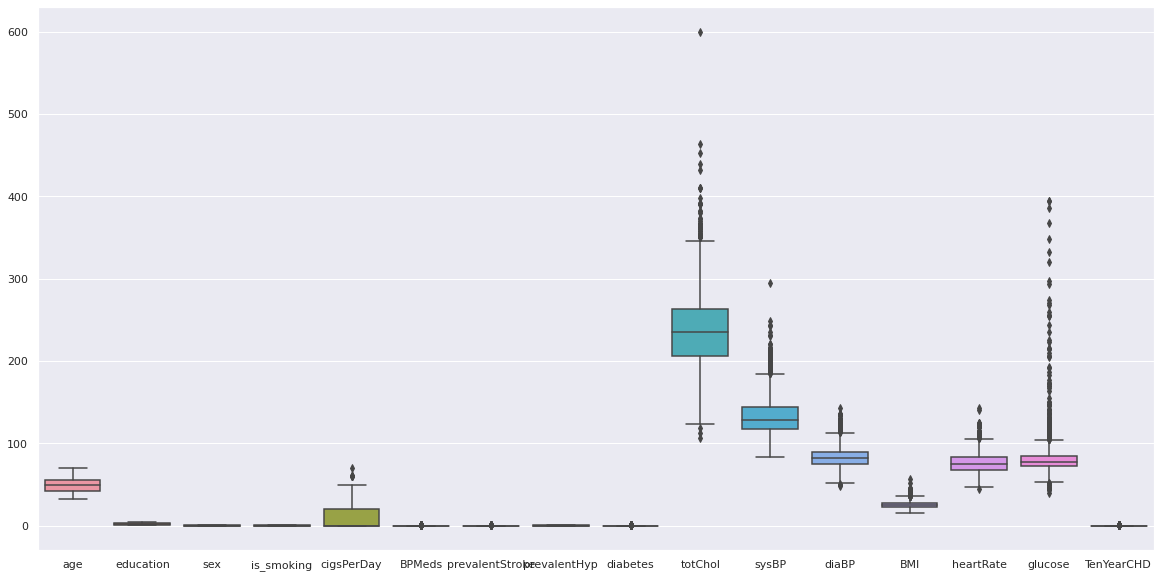

In [ ]:
plt.figure(figsize=(20,10),facecolor='w')
sns.boxplot(data=df)
plt.show()

In [ ]:
print('BloodPressure Outliner ',df['sysBP'].max(),'\nTotal Chorestrol outliner ',df['totChol'].max())

BloodPressure Outliner  295.0 
Total Chorestrol outliner  600.0


In [ ]:
#Reduce Outliners in Data
#Based on above boxplot we can choose the outliners
df=df[df['sysBP']<280]
df=df[df['totChol']<500]


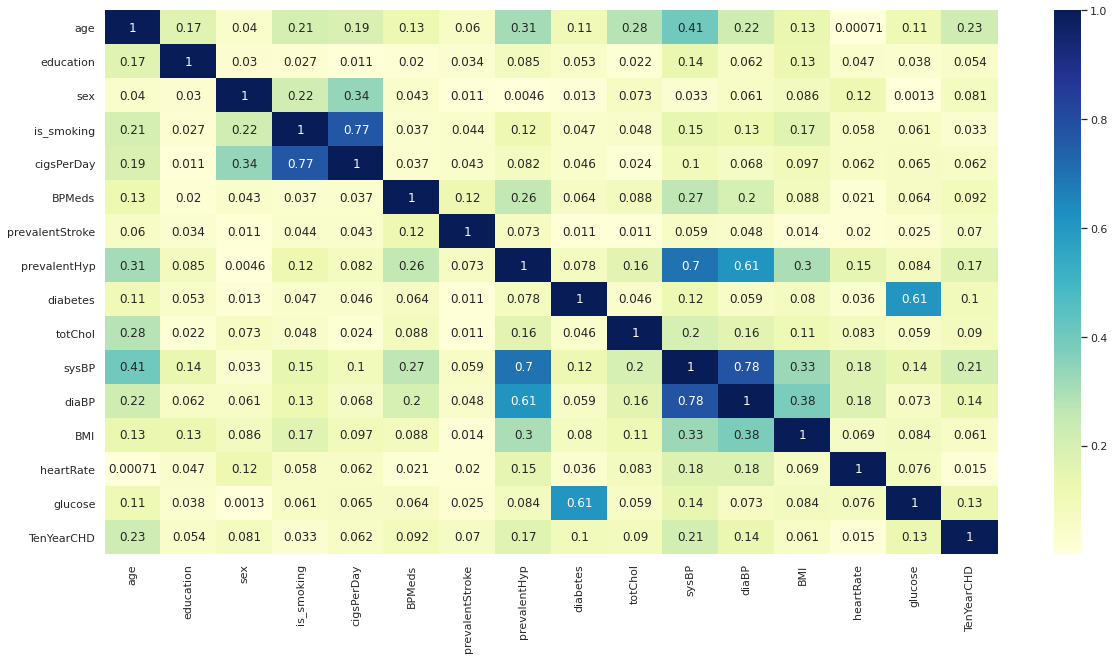

In [ ]:
#correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='YlGnBu',annot=True,annot_kws={'size':12})
plt.show()

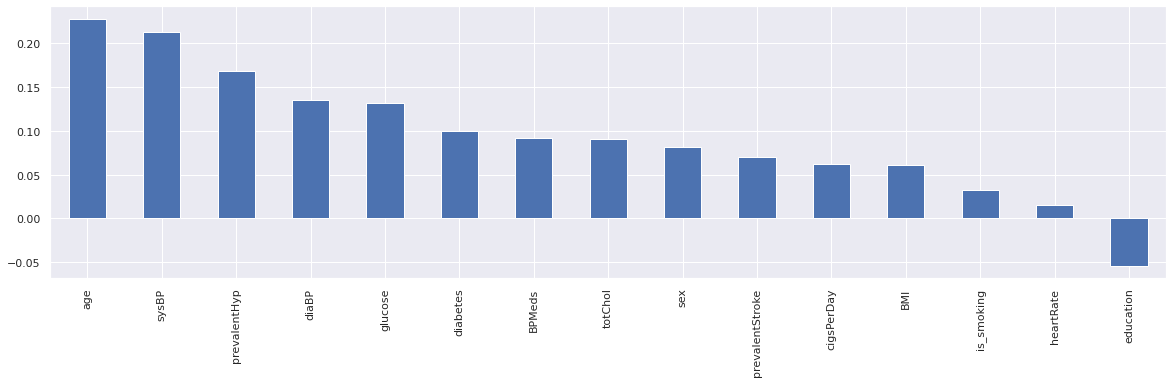

In [ ]:
# Features correlation with TenYearCHD
plt.figure(figsize=(20,5))
df.corr()['TenYearCHD'].sort_values(ascending = False)[1:].plot(kind='bar')

In [ ]:
df.drop(['education'], axis=1,inplace=True)

# **# Step 4: Modeling and Parameter Tuning**

Since there is various units for the values, There is need for Data Scaling
we Prefer Normalisation since its a classification Problem.

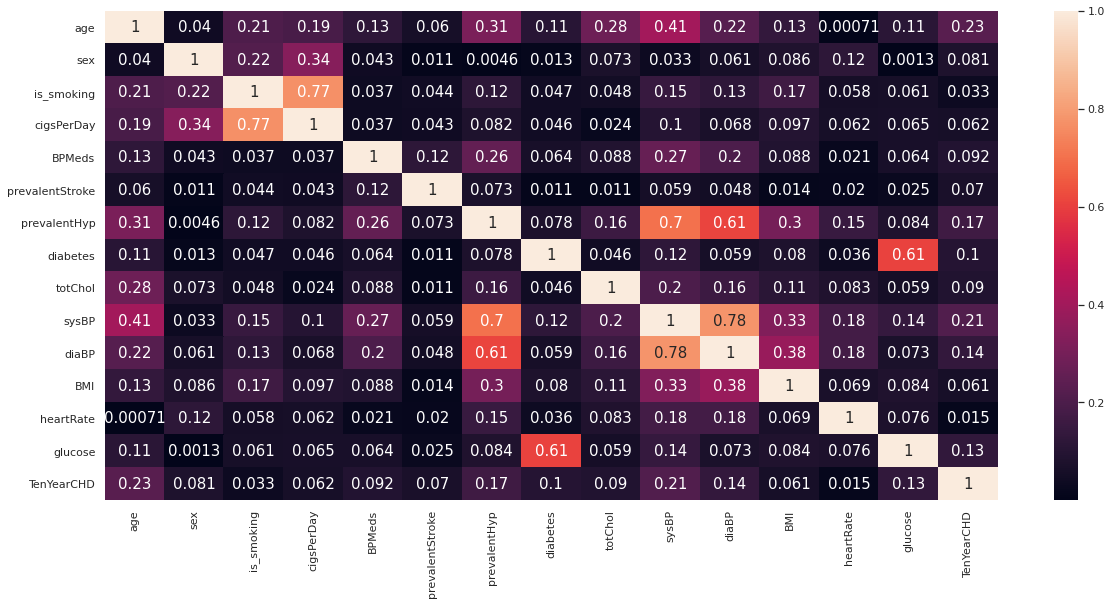

In [ ]:
#correlation Matrix
corr=df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(abs(corr), annot=True, annot_kws={'size':15})
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3281 non-null   int64  
 1   sex              3281 non-null   int64  
 2   is_smoking       3281 non-null   int64  
 3   cigsPerDay       3281 non-null   float64
 4   BPMeds           3281 non-null   float64
 5   prevalentStroke  3281 non-null   int64  
 6   prevalentHyp     3281 non-null   int64  
 7   diabetes         3281 non-null   int64  
 8   totChol          3281 non-null   float64
 9   sysBP            3281 non-null   float64
 10  diaBP            3281 non-null   float64
 11  BMI              3281 non-null   float64
 12  heartRate        3281 non-null   float64
 13  glucose          3281 non-null   float64
 14  TenYearCHD       3281 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 410.1 KB


In [ ]:
df['sex'] = df['sex'].astype(float)
df['is_smoking'] = df['is_smoking'].astype(float)

In [ ]:
#Feature Selection
X=df.loc[:,df.columns!='TenYearCHD']
Y=df.loc[:,df.columns=='TenYearCHD']

In [ ]:
print(X.shape, Y.shape)

(3281, 14) (3281, 1)


In [ ]:
#Checking for Balance of data
pd.DataFrame(y).value_counts()

TenYearCHD
0             2786
1              495
dtype: int64

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input

In [ ]:
from imblearn.over_sampling import SMOTE
X, Y = SMOTE().fit_resample(X, Y)

print('Original Size = ',len(df),'After Resampling = ',len(X))

Original Size =  3281 After Resampling =  5572


In [ ]:
#Recheck for Balance data
pd.DataFrame(Y).value_counts()

1    2786
0    2786
dtype: int64

In [ ]:
#Split the data into Train and test
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25, random_state=101)

scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Lets us Logistic Regression and Check the Performance

confusion matrix: 
 [[460 238]
 [233 462]]

Accuracy for training set for Logistic Regression = 0.6736061258674324

Accuracy for test set for Logistic Regression = 0.6618808327351041

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       693
           1       0.66      0.66      0.66       700

    accuracy                           0.66      1393
   macro avg       0.66      0.66      0.66      1393
weighted avg       0.66      0.66      0.66      1393



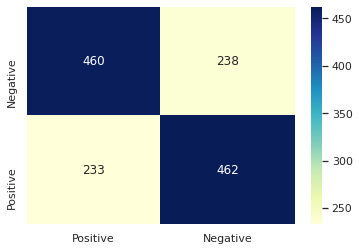

In [ ]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Predicting the Test set results
y_pred = lr.predict(xtest)
y_pred_t = lr.predict(xtrain)

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred, ytest)
cm_train = confusion_matrix(y_pred_t, ytrain)


print('confusion matrix: \n',cm)
print('')
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(ytrain)))
print('')
print('Accuracy for test set for Logistic Regression = {}'.format((cm[0][0] + cm[1][1])/len(ytest)))
print('')
print(classification_report(ytest,y_pred))
sns.heatmap(cm, annot=True,cmap="YlGnBu", fmt="d",xticklabels=['Positive','Negative'], yticklabels=['Negative','Positive'])
plt.show()

In [ ]:
coefs=lr.coef_[0]
top = np.argpartition(coefs, -12)[-12:]
print(df.columns[top].values)

['BMI' 'cigsPerDay' 'BPMeds' 'prevalentStroke' 'prevalentHyp' 'sex'
 'totChol' 'sysBP' 'diaBP' 'is_smoking' 'age' 'glucose']


Feature: 0, Score: 2.73
Feature: 1, Score: 0.38
Feature: 2, Score: 0.37
Feature: 3, Score: 0.95
Feature: 4, Score: 0.48
Feature: 5, Score: 1.30
Feature: 6, Score: 0.12
Feature: 7, Score: -0.04
Feature: 8, Score: 0.57
Feature: 9, Score: 2.02
Feature: 10, Score: 0.23
Feature: 11, Score: 0.01
Feature: 12, Score: -0.69
Feature: 13, Score: 1.94


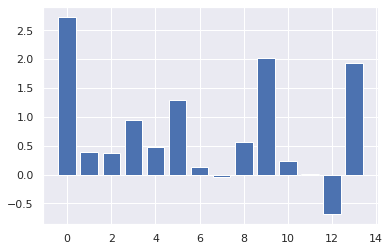

In [ ]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.2f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
df.head(1)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0.0,1.0,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25 ,random_state=1)

## Apply Kfold Cross Validation for choosing best model

In [ ]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),KNeighborsClassifier()]

from sklearn.model_selection import KFold,cross_val_score
def train(model):
  kfold=KFold(n_splits=20,random_state=101,shuffle=True)
  pred=cross_val_score(model,X,Y,cv=kfold)
  cv_score=pred.mean()
  print('Model:',model)
  print('CV-score:',cv_score)

for model in models:
  train(model)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
CV-score: 0.6518243469740337
Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
CV-score: 0.6640423145354685
Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,

## Results : Random Forest Show Best Performance around 90%, Lets try to apply Hyper parametric tuning.

In [ ]:
# Number of trees in random forest and setting other parameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


max_features = ['auto', 'sqrt']


max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print(rf_random.best_score_)

0.8973438621679827


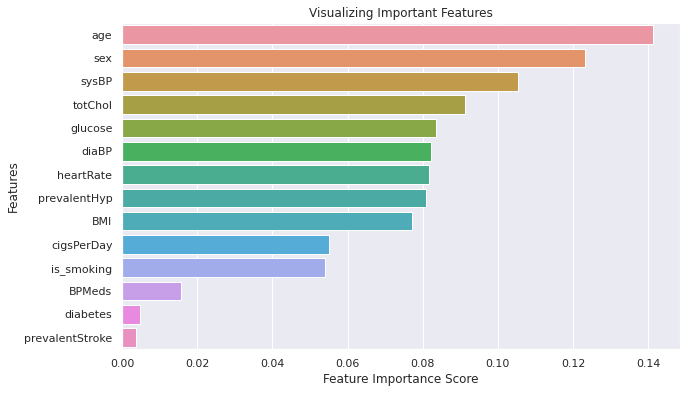

In [ ]:
df.drop(['TenYearCHD'],inplace=True,axis=1)
feature_imp = pd.Series(rf_random.best_estimator_.feature_importances_,index=df.columns).sort_values(ascending=False)
#feature_imp = pd.Series(rf_random.feature_importances_,index=df.feature_names)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## *Performace of model at Best Parameters.*

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}


In [ ]:
# Fit the random search model
rf = rf_random.best_estimator_
rf.fit(xtrain,ytrain)
y_pred = rf.predict(xtest)
print('Performance score on Training Data =',rf.score(xtrain,ytrain)*100)
print('Performance score on Testing Data = ',rf.score(xtest,ytest)*100)
cm=confusion_matrix(y_pred,ytest)

Performance score on Training Data = 100.0
Performance score on Testing Data =  92.17516152189519


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       722
           1       0.94      0.90      0.92       671

    accuracy                           0.92      1393
   macro avg       0.92      0.92      0.92      1393
weighted avg       0.92      0.92      0.92      1393



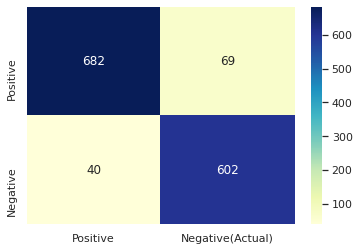

In [ ]:

print(classification_report(ytest,y_pred))
sns.heatmap(cm, annot=True,cmap="YlGnBu", fmt="d",yticklabels=['Positive','Negative'], xticklabels=['Positive','Negative(Actual)'])
plt.show()

# **Summary**
* First imported the libraries and dataset which was in excel file and This dataset contains 3390 rows and 17 columns, then checked for duplication of data and null values.
*	There were more than 300 null values present in single Column was overcome by replace them with most frequent values.
*	To find Effect on other parameters, we plot the features against to coronary Heart disease and plotted their count.
*	Various plots are visualized to see the difference between Gender, Cigers/day ,BMI, Heart-Rate , glucose, etc.
*	Anomaly detection in Total Cholesterol and systolic BP columns
*	Label encoded the categorical columns and checked for the correlations and dropped lesser correlated to Target Variable.
*	Target Variable was highly Unbalanced to train it was overcome by SMOTE resampling Technique and scaled using MinMax Scaler.
*	Logistic Regression model is trained by 25% of split data for evaluating price prediction and model performance score was 66%
*	Applied K-Fold Cross Validation score to find Best estimator Later it was tunned for best accuracy which was more than 92%.
* Detailed visualization of Importance of each feature variables, Confusion matrix and Classification report. 




# **Challenges**

*   What ever data we imported was very less and with more null values.
*   few features as well as target variable is not balanced.

# **Inference**
*	Based on Given data there is no risk of coronary heart disease on smokers and Non-Smokers
*	Coronary Heart Disease risk is high with patients with diabetes, Stoke, Hypertension, Cigers/day.etc.
*	Heart rate most of values are at 75, Comparatively there is normal risk over all ranges of heart rate, similarly education is also not much influence the target variable. 
*	The performance of prediction is good with Random Forest after tuning with n_estimators to 400 and max_depth to 90 Precision and recall was much improved.

